In [292]:
import numpy as np
import pandas as pd


In [302]:
!python lvhba.py

Epoch [10/50], model_inner: Loss: 0.1768, Train Acc: 0.9703, Val Acc: 0.9528, Test Acc: 0.9528
Epoch [20/50], model_inner: Loss: 0.1224, Train Acc: 0.9851, Val Acc: 0.9611, Test Acc: 0.9667
Epoch [30/50], model_inner: Loss: 0.1282, Train Acc: 0.9935, Val Acc: 0.9694, Test Acc: 0.9667
Epoch [40/50], model_inner: Loss: 0.2297, Train Acc: 0.9944, Val Acc: 0.9833, Test Acc: 0.9667
Epoch [50/50], model_inner: Loss: 0.3879, Train Acc: 0.9954, Val Acc: 0.9889, Test Acc: 0.9611
C:  19.970245361328125
Epoch [10/50], model_inner: Loss: 0.2663, Train Acc: 0.9721, Val Acc: 0.9556, Test Acc: 0.9472
Epoch [20/50], model_inner: Loss: 0.1468, Train Acc: 0.9861, Val Acc: 0.9750, Test Acc: 0.9694
Epoch [30/50], model_inner: Loss: 0.1208, Train Acc: 0.9935, Val Acc: 0.9833, Test Acc: 0.9694
Epoch [40/50], model_inner: Loss: 0.1769, Train Acc: 0.9954, Val Acc: 0.9889, Test Acc: 0.9694
Epoch [50/50], model_inner: Loss: 0.2596, Train Acc: 0.9954, Val Acc: 0.9944, Test Acc: 0.9667
C:  19.970245361328125
Epoc

In [160]:
!python salvf_old.py

C:  90.20147705078125
C:  39.69136047363281
C:  5113.7939453125
C:  75.51405334472656
C:  60.88426208496094
C:  70.68643188476562
C:  136.63380432128906
C:  40.793067932128906
C:  43.692935943603516
C:  52.73503112792969


In [209]:
!python salvfvr.py

C:  61.373680114746094
C:  116.84202575683594
C:  67.85134887695312
C:  157.88099670410156
C:  70.91940307617188
C:  76.64559936523438
C:  56.15479278564453
C:  153.391357421875
C:  83.06455993652344
C:  58.10240936279297


In [178]:
!python blooc.py

C:  20.2414493560791
C:  111809.0
C:  789.2443237304688
C:  33.85861587524414
C:  98.20429992675781
C:  22.95067024230957
C:  222.65708923339844
C:  44.920257568359375
C:  20.2414493560791
C:  74.182861328125


In [196]:
!python salvf_old.py

C:  1652.783935546875
C:  134.68243408203125
C:  83.13015747070312
C:  75.19989776611328
C:  63.154518127441406
C:  76.70516967773438
C:  74.59428405761719
C:  218.2742919921875
C:  56.55777359008789
C:  120.37420654296875


In [194]:
!python MLP1.py

Epoch [1/100], Loss: 2.3045, Train Acc: 0.1718, Val Acc: 0.1861 Test Acc: 0.1556
Epoch [2/100], Loss: 2.2089, Train Acc: 0.2693, Val Acc: 0.3083 Test Acc: 0.2694
Epoch [3/100], Loss: 2.1657, Train Acc: 0.3937, Val Acc: 0.4111 Test Acc: 0.4056
Epoch [4/100], Loss: 2.1095, Train Acc: 0.4838, Val Acc: 0.5167 Test Acc: 0.4861
Epoch [5/100], Loss: 1.9447, Train Acc: 0.5840, Val Acc: 0.6250 Test Acc: 0.5778
Epoch [6/100], Loss: 1.9260, Train Acc: 0.6741, Val Acc: 0.6833 Test Acc: 0.6500
Epoch [7/100], Loss: 1.7560, Train Acc: 0.7196, Val Acc: 0.7306 Test Acc: 0.7056
Epoch [8/100], Loss: 1.7273, Train Acc: 0.7512, Val Acc: 0.7722 Test Acc: 0.7361
Epoch [9/100], Loss: 1.5921, Train Acc: 0.7716, Val Acc: 0.7917 Test Acc: 0.7611
Epoch [10/100], Loss: 1.5596, Train Acc: 0.7864, Val Acc: 0.8194 Test Acc: 0.7806
Epoch [11/100], Loss: 1.5247, Train Acc: 0.8022, Val Acc: 0.8333 Test Acc: 0.7972
Epoch [12/100], Loss: 1.5003, Train Acc: 0.8162, Val Acc: 0.8389 Test Acc: 0.8167
Epoch [13/100], Loss: 1.3

In [303]:
import matplotlib.pyplot as plt
import pandas as pd

for method in [ "SALVF","SALVFVR", "BLOOC", "LVHBA", "baseline"]:
    save_path = method + '_history.csv'
# -------------------------
# Load the CSV file
    df = pd.read_csv(save_path)

    # Convert the string representation of lists back to Python lists
    # df["values"] = df["values"].apply(eval)

    # Initialize a dictionary for reconstructed variables
    reconstructed_variables = {}

    # Group by method and metric, and dynamically create variables
    for metric, group in df.groupby(["metric"]):
        # Create variable name dynamically, e.g., "train_acc_lvhba"
        variable_name = f"{metric}_{method}"
        # Sort by index to preserve order and convert to list
        reconstructed_variables[variable_name] = group.sort_values("index")["values"].tolist()
        for i in range(len(reconstructed_variables[variable_name])):
            s = reconstructed_variables[variable_name][i]
            s = s.replace('[','')
            s = s.replace(']','')
            s = s.split(' ')
            s = [float(x) for x in s if x != '']
            reconstructed_variables[variable_name][i] = np.array(s)
            
        reconstructed_variables[variable_name] = np.array(reconstructed_variables[variable_name])

    # Dynamically assign each variable to the global namespace (optional)
    globals().update(reconstructed_variables)

ValueError: x and y must have same first dimension, but have shapes (50,) and (100,)

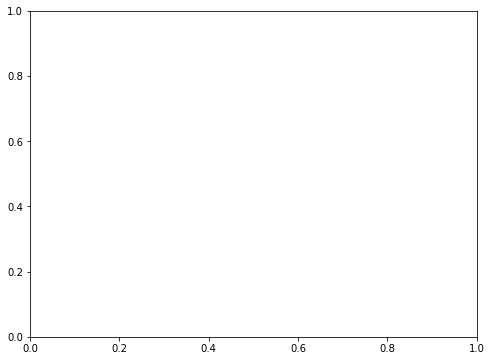

In [304]:
epochs = 50
axis_iter = np.arange(epochs)
plt.figure(figsize=(8,6))

test_acc_salvf = test_acc_inner_SALVF
test_acc_salvfvr = test_acc_inner_SALVFVR
test_acc_blooc = test_acc_inner_BLOOC
test_acc_lvhba = test_acc_inner_LVHBA
test_acc_baseline = test_acc_baseline



plt.plot(axis_iter,test_acc_salvf.mean(0),'*',label="SALVF")
plt.fill_between(axis_iter,test_acc_salvf.mean(0)-test_acc_salvf.std(0),test_acc_salvf.mean(0)+test_acc_salvf.std(0),alpha=0.2)

plt.plot(axis_iter,test_acc_salvfvr.mean(0),'o',label="SALVFVR",color='purple', markersize=2)
plt.fill_between(axis_iter,test_acc_salvfvr.mean(0)-test_acc_salvfvr.std(0),test_acc_salvfvr.mean(0)+test_acc_salvfvr.std(0),alpha=0.2,color='purple')

plt.plot(axis_iter,test_acc_blooc.mean(0),'-',label="BLOOC")
plt.fill_between(axis_iter,test_acc_blooc.mean(0)-test_acc_blooc.std(0),test_acc_blooc.mean(0)+test_acc_blooc.std(0),alpha=0.2)

plt.plot(axis_iter,test_acc_lvhba.mean(0),'-',label="LVHBA")
plt.fill_between(axis_iter,test_acc_lvhba.mean(0)-test_acc_lvhba.std(0),test_acc_lvhba.mean(0)+test_acc_lvhba.std(0),alpha=0.2)


plt.plot(axis_iter,test_acc_baseline.mean(0),'-',label="no weight decay")
# plt.fill_between(axis_iter,test_acc_baseline.mean(0)-test_acc_baseline.std(0),test_acc_baseline.mean(0)+test_acc_baseline.std(0),alpha=0.2)

plt.xlim(3,epochs)
plt.ylim(0.92,0.98)
plt.legend(loc='lower right', fontsize=14)
plt.title('Test Accuracy', fontsize=18)
plt.xlabel('Iteration Count', fontsize=18)
plt.ylabel("Accuracy", fontsize=14)



Text(0, 0.5, 'Accuracy')

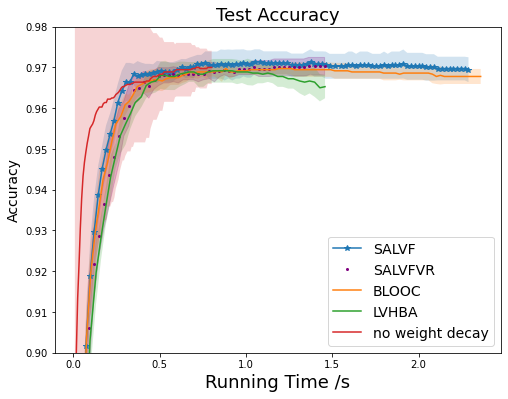

In [305]:
epochs = 50
plt.figure(figsize=(8,6))

test_acc_salvf = test_acc_inner_SALVF
test_acc_salvfvr = test_acc_inner_SALVFVR
test_acc_blooc = test_acc_inner_BLOOC
test_acc_lvhba = test_acc_inner_LVHBA
test_acc_baseline = test_acc_baseline


axis_time_salvf = time_SALVF.mean(0)
plt.plot(axis_time_salvf,test_acc_salvf.mean(0),'*-',label="SALVF")
plt.fill_between(axis_time_salvf,test_acc_salvf.mean(0)-test_acc_salvf.std(0),test_acc_salvf.mean(0)+test_acc_salvf.std(0),alpha=0.2)

axis_time_salvfvr = time_SALVFVR.mean(0)
plt.plot(axis_time_salvfvr,test_acc_salvfvr.mean(0),'o',label="SALVFVR", color='purple', markersize=2)
plt.fill_between(axis_time_salvfvr,test_acc_salvfvr.mean(0)-test_acc_salvfvr.std(0),test_acc_salvfvr.mean(0)+test_acc_salvfvr.std(0),alpha=0.2, color='purple')

axis_time_blooc = time_BLOOC.mean(0)
plt.plot(axis_time_blooc,test_acc_blooc.mean(0),'-',label="BLOOC")
plt.fill_between(axis_time_blooc,test_acc_blooc.mean(0)-test_acc_blooc.std(0),test_acc_blooc.mean(0)+test_acc_blooc.std(0),alpha=0.2)

axis_time_lvhba = time_LVHBA.mean(0)
plt.plot(axis_time_lvhba,test_acc_lvhba.mean(0),'-',label="LVHBA")
plt.fill_between(axis_time_lvhba,test_acc_lvhba.mean(0)-test_acc_lvhba.std(0),test_acc_lvhba.mean(0)+test_acc_lvhba.std(0),alpha=0.2)

axis_time_baseline = time_baseline.mean(0)
plt.plot(axis_time_baseline,test_acc_baseline.mean(0),'-',label="no weight decay")
plt.fill_between(axis_time_baseline,test_acc_baseline.mean(0)-test_acc_baseline.std(0),test_acc_baseline.mean(0)+test_acc_baseline.std(0),alpha=0.2)

# plt.xlim(0, 1)
plt.ylim(0.9,0.98)
plt.legend(loc='lower right', fontsize=14)
plt.title('Test Accuracy', fontsize=18)
plt.xlabel('Running Time /s', fontsize=18)
plt.ylabel("Accuracy", fontsize=14)



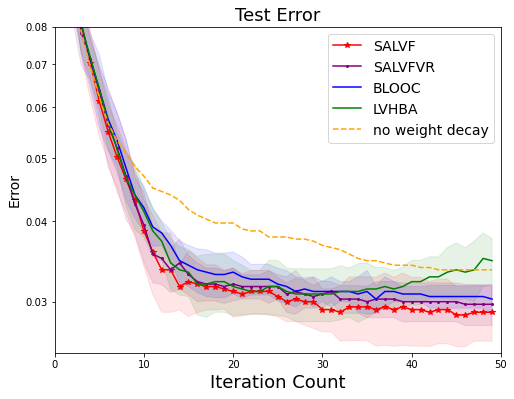

In [315]:
epochs = 50
axis_iter = np.arange(epochs)
plt.figure(figsize=(8,6))

test_acc_salvf = test_acc_inner_SALVF[:, 0:epochs]
test_acc_salvfvr = test_acc_inner_SALVFVR[:, 0:epochs]
test_acc_blooc = test_acc_inner_BLOOC[:, 0:epochs]
test_acc_lvhba = test_acc_inner_LVHBA[:, 0:epochs]
test_acc_baseline = test_acc_baseline[:, 0:epochs]


test_err_salvf = 1 - test_acc_salvf
test_err_salvfvr = 1 - test_acc_salvfvr
test_err_blooc = 1 - test_acc_blooc
test_err_lvhba = 1 - test_acc_lvhba
test_err_baseline = 1 - test_acc_baseline

plt.plot(axis_iter,test_err_salvf.mean(0),'*-',label="SALVF",color='red')
plt.fill_between(axis_iter,test_err_salvf.mean(0)-test_err_salvf.std(0),test_err_salvf.mean(0)+test_err_salvf.std(0),alpha=0.1,color='red')

plt.plot(axis_iter,test_err_salvfvr.mean(0),'o-',label="SALVFVR",color='purple', markersize=2)
plt.fill_between(axis_iter,test_err_salvfvr.mean(0)-test_err_salvfvr.std(0),test_err_salvfvr.mean(0)+test_err_salvfvr.std(0),alpha=0.1,color='purple')

plt.plot(axis_iter,test_err_blooc.mean(0),'-',label="BLOOC",markersize=3,color='blue')
plt.fill_between(axis_iter,test_err_blooc.mean(0)-test_err_blooc.std(0),test_err_blooc.mean(0)+test_err_blooc.std(0),alpha=0.1,color='blue')

plt.plot(axis_iter,test_err_lvhba.mean(0),'-',label="LVHBA",markersize=2,color='green')
plt.fill_between(axis_iter,test_err_lvhba.mean(0)-test_err_lvhba.std(0),test_err_lvhba.mean(0)+test_err_lvhba.std(0),alpha=0.1,color='green')

plt.plot(axis_iter,test_err_baseline.mean(0),'--',label="no weight decay",color='orange')
# plt.fill_between(axis_iter,test_err_baseline.mean(0)-test_err_baseline.std(0),test_err_baseline.mean(0)+test_err_baseline.std(0),alpha=0.2)
# plt.xlim(0, 1)
# # Use ScalarFormatter to avoid scientific notation
# plt.xlim(0, 1)
# plt.ylim(0.02,0.08)
plt.yscale('log')  # Apply logarithmic scale to y-axis
plt.yscale('log')  # Apply logarithmic scale to y-axis
plt.ylim(0.025,0.08)
# plt.xlim(0, 1)
# # Use ScalarFormatter to avoid scientific notation
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import LogLocator, FuncFormatter
# Disable scientific notation by using LogLocator with a custom base
plt.gca().yaxis.set_major_locator(LogLocator(base=10.0, subs='auto', numticks=10))

# Use FuncFormatter to control the formatting of tick labels
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x , _: f'{x:.2f}'))

# Use FuncFormatter to control the formatting of tick labels


plt.xlim(0,50)
plt.legend(loc='upper right', fontsize=14)
plt.title('Test Error', fontsize=18)
plt.xlabel('Iteration Count', fontsize=18)
plt.ylabel("Error", fontsize=14)


plt.savefig('/Users/niehantao/Desktop/niehantao/tex/stochastic_constrained_bilevel/figs/weight_decay_test_error_vs_iter.pdf',bbox_inches='tight')

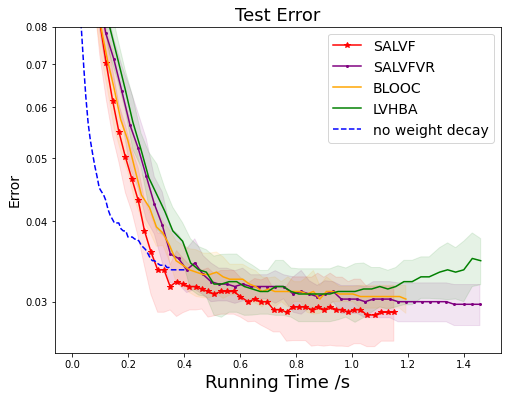

In [316]:
epochs = 50
plt.figure(figsize=(8,6))

test_acc_salvf = test_acc_inner_SALVF[:, 0: epochs]
test_acc_salvfvr = test_acc_inner_SALVFVR[:, 0: epochs]
test_acc_blooc = test_acc_inner_BLOOC[:, 0: epochs]
test_acc_lvhba = test_acc_inner_LVHBA[:, 0: epochs]
test_acc_baseline = test_acc_baseline[:, 0: epochs]

test_err_salvf = 1 - test_acc_salvf
test_err_salvfvr = 1 - test_acc_salvfvr
test_err_blooc = 1 - test_acc_blooc
test_err_lvhba = 1 - test_acc_lvhba
test_err_baseline = 1 - test_acc_baseline


axis_time_salvf = time_SALVF.mean(0)[0: epochs]
plt.plot(axis_time_salvf,test_err_salvf.mean(0),'*-',label="SALVF", color='red')
plt.fill_between(axis_time_salvf,test_err_salvf.mean(0)-test_err_salvf.std(0),test_err_salvf.mean(0)+test_err_salvf.std(0),alpha=0.1, color='red')

axis_time_salvfvr = time_SALVFVR.mean(0)[0: epochs]
plt.plot(axis_time_salvfvr,test_err_salvfvr.mean(0),'o-',label="SALVFVR", color='purple', markersize=2)
plt.fill_between(axis_time_salvfvr,test_err_salvfvr.mean(0)-test_err_salvfvr.std(0),test_err_salvfvr.mean(0)+test_err_salvfvr.std(0),alpha=0.1, color='purple')

axis_time_blooc = time_BLOOC.mean(0)[0: epochs]
plt.plot(axis_time_blooc,test_err_blooc.mean(0),'-',label="BLOOC", markersize=3, color='blue')
plt.fill_between(axis_time_blooc,test_err_blooc.mean(0)-test_err_blooc.std(0),test_err_blooc.mean(0)+test_err_blooc.std(0),alpha=0.1, color='blue')

axis_time_lvhba = time_LVHBA.mean(0)[0: epochs]
plt.plot(axis_time_lvhba,test_err_lvhba.mean(0),'-',label="LVHBA", color='green', markersize=2)
plt.fill_between(axis_time_lvhba,test_err_lvhba.mean(0)-test_err_lvhba.std(0),test_err_lvhba.mean(0)+test_err_lvhba.std(0),alpha=0.1, color='green')    

axis_time_baseline = time_baseline.mean(0)[0: epochs]
plt.plot(axis_time_baseline,test_err_baseline.mean(0),'--',label="no weight decay", color='orange')

plt.ylim(0.025,0.08)
plt.yscale('log')  # Apply logarithmic scale to y-axis

# plt.xlim(0.2, 1.6)
# # Use ScalarFormatter to avoid scientific notation
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import LogLocator, FuncFormatter
# Disable scientific notation by using LogLocator with a custom base
plt.gca().yaxis.set_major_locator(LogLocator(base=10.0, subs='auto', numticks=10))

# Use FuncFormatter to control the formatting of tick labels
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x , _: f'{x:.2f}'))

plt.legend(loc='upper right', fontsize=14)
plt.title('Test Error', fontsize=18)
plt.xlabel('Running Time /s', fontsize=18)
plt.ylabel("Error", fontsize=14)

plt.savefig('/Users/niehantao/Desktop/niehantao/tex/stochastic_constrained_bilevel/figs/weight_decay_test_error_vs_time.pdf',bbox_inches='tight')


Text(0, 0.5, 'Error')

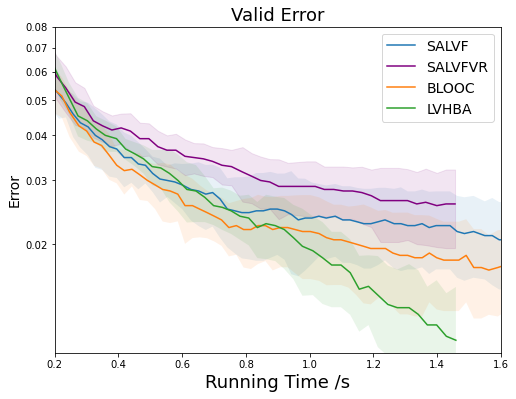

In [313]:
epochs = 50
plt.figure(figsize=(8,6))

val_acc_salvf = val_acc_inner_SALVF
val_acc_salvfvr = val_acc_inner_SALVFVR
val_acc_blooc = val_acc_inner_BLOOC
val_acc_lvhba = val_acc_inner_LVHBA
val_acc_baseline = val_acc_baseline

val_err_salvf = 1 - val_acc_salvf
val_err_salvfvr = 1 - val_acc_salvfvr
val_err_blooc = 1 - val_acc_blooc
val_err_lvhba = 1 - val_acc_lvhba
val_err_baseline = 1 - val_acc_baseline


axis_time_salvf = time_SALVF.mean(0)
plt.plot(axis_time_salvf,val_err_salvf.mean(0),'-',label="SALVF")
plt.fill_between(axis_time_salvf,val_err_salvf.mean(0)-val_err_salvf.std(0),val_err_salvf.mean(0)+val_err_salvf.std(0),alpha=0.1)

axis_time_salvfvr = time_SALVFVR.mean(0)
plt.plot(axis_time_salvfvr,val_err_salvfvr.mean(0),'-',label="SALVFVR", color='purple', markersize=2)
plt.fill_between(axis_time_salvfvr,val_err_salvfvr.mean(0)-val_err_salvfvr.std(0),val_err_salvfvr.mean(0)+val_err_salvfvr.std(0),alpha=0.1, color='purple')

axis_time_blooc = time_BLOOC.mean(0)
plt.plot(axis_time_blooc,val_err_blooc.mean(0),'-',label="BLOOC",markersize=2)
plt.fill_between(axis_time_blooc,val_err_blooc.mean(0)-val_err_blooc.std(0),val_err_blooc.mean(0)+val_err_blooc.std(0),alpha=0.1)

axis_time_lvhba = time_LVHBA.mean(0)
plt.plot(axis_time_lvhba,val_err_lvhba.mean(0),'-',label="LVHBA",markersize=2)
plt.fill_between(axis_time_lvhba,val_err_lvhba.mean(0)-val_err_lvhba.std(0),val_err_lvhba.mean(0)+val_err_lvhba.std(0),alpha=0.1)

# axis_time_baseline = time_baseline.mean(0)
# plt.plot(axis_time_baseline,val_err_baseline.mean(0),'--',label="no weight decay")

plt.xlim(0.2, 1.6)
plt.ylim(0.01,0.08)
plt.yscale('log')  # Apply logarithmic scale to y-axis

# plt.xlim(0, 1)
# # Use ScalarFormatter to avoid scientific notation
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import LogLocator, FuncFormatter
# Disable scientific notation by using LogLocator with a custom base
plt.gca().yaxis.set_major_locator(LogLocator(base=10.0, subs='auto', numticks=10))

# Use FuncFormatter to control the formatting of tick labels
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x , _: f'{x:.2f}'))

plt.legend(loc='upper right', fontsize=14)
plt.title('Valid Error', fontsize=18)
plt.xlabel('Running Time /s', fontsize=18)
plt.ylabel("Error", fontsize=14)

